#### 4.3.3.2. 색상 채널과 픽셀 단위 조작

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

(-0.5, 5670.5, 3780.5, -0.5)

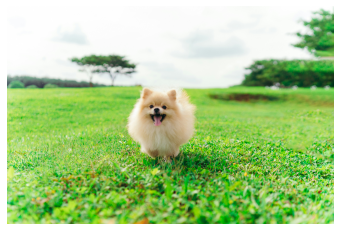

In [2]:
# 이미지 불러오기
img = Image.open('puppy.jpg')
plt.imshow(img)
plt.axis('off')

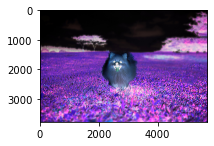

In [4]:
# 색상 반전
img_array = np.array(img)
inverted =255-img_array

plt.figure(figsize =(3,4))
plt.imshow(inverted)

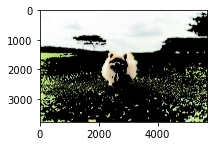

In [11]:
# 밝은 영역만 추출 : 조건문과 마스킹 사용
# 마스킹(masking) : 불리언 배열로 조건에 맞는 데이터만 선택하거나 조작하는 방법
gray = img_array.mean(axis = 2)
mask = gray > gray.mean() 

bright_part = img_array.copy()
bright_part[~mask] = 0     # 어두운 영역은 0(검정)으로 처리

plt.figure(figsize =(3,4))
plt.imshow(bright_part)

#### 4.3.3.3. 이미지 변형

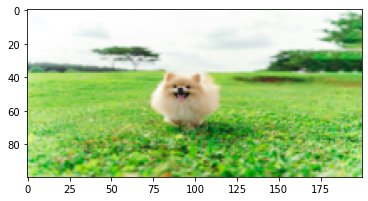

In [13]:
# 크기 조절 : 너비 200px, 높이 100px
resized = img.resize((200,100))
plt.imshow(resized)

# 화질 안 좋아짐

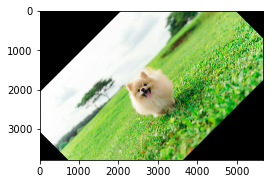

In [14]:
# 45도 회전
rotated_img = img.rotate(45)

plt.figure(figsize=(4, 4))
plt.imshow(rotated_img)

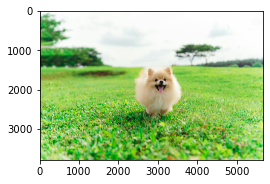

In [16]:
# 좌우 반전 뒤집기
flipped_img1 = img.transpose(Image.FLIP_LEFT_RIGHT)

plt.figure(figsize=(4, 4))
plt.imshow(flipped_img1)

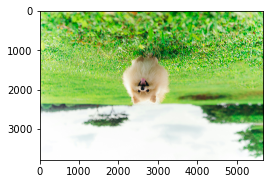

In [17]:
# 상하 반전 뒤집기
flipped_img2 = img.transpose(Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(4, 4))
plt.imshow(flipped_img2)

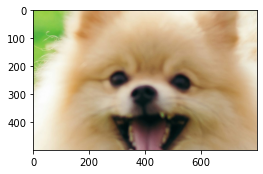

In [22]:
# 잘라내기 : (left, top, right, bottom) -> 왼쪽부터 시계방향
cropped = img.crop((2200, 1500, 3000, 2000))
plt.figure(figsize=(4, 4))
plt.imshow(cropped)

#### 4.3.3.4. 색상 정보 요약

In [27]:
# 각 채널의 평균 axis를 추가해야 채널별 평균 나옴!
# 평균이 가장 높은 초록색 계열이 이미지에 가장 많이 포함되어 있음
# 다음으로는 빨간색 계열, 파란색 계열 순임

np.mean(img, axis = (0,1))

array([162.37344469, 200.0259499 , 129.55953682])

In [29]:
# 각 채널의 표준편차
# 표준편차가 가장 큰 파란색 계열 -> 밝기 면에서 가장 다양하게 분포하고 있음
# -> 밝고 어두운 부분에 걸쳐 넓게 퍼져 있어 이미지 내에서 변동이 큼
# 초록색 계열은 상대적으로 균일한 밝기 분포를 가짐 (대부분이 다 밝은 컬러라는 것)


np.std(img, axis = (0,1))

array([70.6246244 , 45.88057169, 84.54941934])

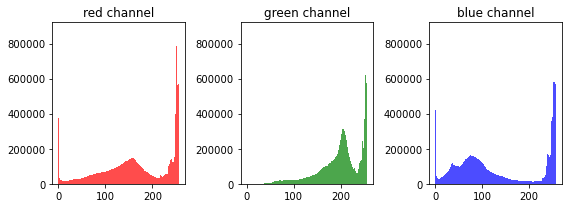

In [18]:
colors = ('red', 'green', 'blue')

plt.figure(figsize = (8,3))
y_max = 0
for i in range(3): 
    freq, _ = np.histogram(img_array[:, :,i], bins = np.arange(257))
    y_max = max(y_max, freq.max())

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    plt.hist(img_array[:, :, i].ravel(), bins=np.arange(257), color=color, alpha=0.7)
    plt.ylim([0, y_max])
    plt.title(f"{color} channel")
    plt.tight_layout()
plt.show()

In [16]:
y_max = 0
for i in range(3): 
    freq, _ = np.histogram(img_array[:, :,i], bins = np.arange(257))
    y_max = max(y_max, freq.max())

In [14]:
i

2